In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from mlxtend.plotting import scatterplotmatrix

In [3]:
df = pd.read_csv('FinalList.csv')
df

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,BP,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,1,"1,3,5-trimethylbenzene",Hydrocarbons,Aromatic hydrocarbons,Monocyclic aromatic hydrocarbons,437.908,0.182452,NIST,Cc1cc(C)cc(C)c1,437.872222,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,2,1-Butene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,266.844,0.244792,NIST,CCC=C,267.038889,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,3,1-Pentene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,303.102,0.065615,NIST,CCCC=C,303.038889,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,4,"2,3-Dimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,362.941,0.395675,NIST,CCC(C)C(C)C,363.150000,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,5,"2,5-dimethylhexane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.231,0.067620,NIST,CC(C)CCC(C)C,382.261111,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,trans-2-hexene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,341.005,0.014359,NIST,CCC/C=C/C,341.020000,...,0,0,157.041260,1.275000,0.023728,-1.179628,-4.126941,32.183671,0.150380,0.240837
321,322,trans-crotonic acid,Carboxylic acids and salts,Aliphatic carboxylic acids,Alkenylcarboxylic acids,455.644,1.544870,NIST,C/C=C/C(O)=O,458.150000,...,2,0,14.829893,0.720190,0.045617,-7.854970,-31.651760,15.531601,0.384312,0.561076
322,323,trimethylamine,Amines,Aliphatic amines,Tertiary aliphatic amines,276.068,0.240339,NIST,CN(C)C,276.020000,...,1,0,109.058920,1.176416,0.029365,-0.763550,-3.439881,20.043798,0.111111,0.881493
323,324,valeraldehyde,Aldehydes,Aliphatic aldehydes,Alkyl aldehydes,375.811,0.150969,NIST,CCCCC=O,376.150000,...,1,0,121.591801,1.154950,0.029459,-4.750226,-17.386313,28.463014,0.253451,0.643550


In [4]:
df.drop(['ID','Fuel','Molecular Formula','SMILES','Class','Sub-Class','Group','Uncertainty','Source','BP'],axis = 1,inplace = True)
df.head()

,BP2,N_Atoms,MW,IC0,PJ3,SIC0,GATS1v,Wiener,Z1,HOMO,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,437.908,21,120.195,0.985228,0.318633,0.224307,1.111111,84,42,-0.227243,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,266.844,12,56.108,0.918296,0.363684,0.256152,1.500000,10,10,-0.249853,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,303.102,15,70.135,0.918296,0.372016,0.235045,1.500000,20,14,-0.249613,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,362.941,23,100.205,0.886541,0.454902,0.195983,1.642857,46,26,-0.296727,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,382.231,26,114.232,0.890492,0.374392,0.189449,1.625000,74,30,-0.299486,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495


# Visualize the data 

<bound method Artist.set of <AxesSubplot:xlabel='Normal Boiling Point (K)', ylabel='Count'>>

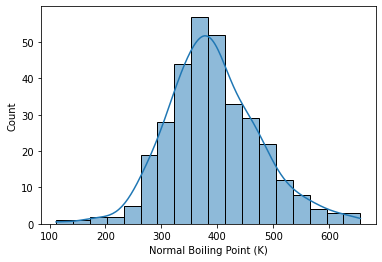

In [5]:
ax = sns.histplot(data=df, x='BP2', kde=True)
ax.set(xlabel='Normal Boiling Point (K)')
ax.set

# Drop unnecessary variables

In [6]:
cor = df.corr().abs()

#Correlation with output variable
cor_target = cor["BP2"].copy()

#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.5]
print('Correlations with boiling point','\n')
print(cor_target,'\n')
print('----------------------------------------------'+'\n')
print('Relevant features', '\n')
print(relevant_features)

Correlations with boiling point 

BP2          1.000000
N_Atoms      0.703925
MW           0.856295
IC0          0.165240
PJ3          0.147249
SIC0         0.292956
GATS1v       0.464407
Wiener       0.626291
Z1           0.855104
HOMO         0.131678
LUMO         0.275007
DM           0.152935
EI           0.263393
CP           0.190069
H            0.233919
BalabanJ     0.251205
CIC3         0.086989
GGI4         0.608230
JGI1         0.195518
Mor10v       0.381481
Mor16se      0.509663
GRAVH        0.854669
HBondA       0.263100
HBondD       0.206910
HeteroA      0.292217
AromaticR    0.478332
CPS          0.365955
GATS2m       0.041096
FPSA3        0.118181
WNSA3        0.588267
PNSA3        0.342457
ATS3p        0.720093
RPCG         0.135305
RNCG         0.350090
Name: BP2, dtype: float64 

----------------------------------------------

Relevant features 

BP2        1.000000
N_Atoms    0.703925
MW         0.856295
Wiener     0.626291
Z1         0.855104
GGI4       0.608230
Mo

In [7]:
cor_target.sort_values(axis=0,ascending=False,inplace=True)#this is a series
cor_target #arrange in descending order based on correlation with BP

BP2          1.000000
MW           0.856295
Z1           0.855104
GRAVH        0.854669
ATS3p        0.720093
N_Atoms      0.703925
Wiener       0.626291
GGI4         0.608230
WNSA3        0.588267
Mor16se      0.509663
AromaticR    0.478332
GATS1v       0.464407
Mor10v       0.381481
CPS          0.365955
RNCG         0.350090
PNSA3        0.342457
SIC0         0.292956
HeteroA      0.292217
LUMO         0.275007
EI           0.263393
HBondA       0.263100
BalabanJ     0.251205
H            0.233919
HBondD       0.206910
JGI1         0.195518
CP           0.190069
IC0          0.165240
DM           0.152935
PJ3          0.147249
RPCG         0.135305
HOMO         0.131678
FPSA3        0.118181
CIC3         0.086989
GATS2m       0.041096
Name: BP2, dtype: float64

In [8]:
relevant_features.sort_values(axis=0, ascending=False, inplace=True) #this is a series
relevant_features #features with correlation coefficient with BP greater than .5

BP2        1.000000
MW         0.856295
Z1         0.855104
GRAVH      0.854669
ATS3p      0.720093
N_Atoms    0.703925
Wiener     0.626291
GGI4       0.608230
WNSA3      0.588267
Mor16se    0.509663
Name: BP2, dtype: float64

In [9]:
new_list=cor_target.keys().tolist()
new_list

['BP2',
 'MW',
 'Z1',
 'GRAVH',
 'ATS3p',
 'N_Atoms',
 'Wiener',
 'GGI4',
 'WNSA3',
 'Mor16se',
 'AromaticR',
 'GATS1v',
 'Mor10v',
 'CPS',
 'RNCG',
 'PNSA3',
 'SIC0',
 'HeteroA',
 'LUMO',
 'EI',
 'HBondA',
 'BalabanJ',
 'H',
 'HBondD',
 'JGI1',
 'CP',
 'IC0',
 'DM',
 'PJ3',
 'RPCG',
 'HOMO',
 'FPSA3',
 'CIC3',
 'GATS2m']

In [10]:
df2=df.reindex(columns=new_list)

df2

,BP2,MW,Z1,GRAVH,ATS3p,N_Atoms,Wiener,GGI4,WNSA3,Mor16se,...,JGI1,CP,IC0,DM,PJ3,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,437.908,120.195,42,1308.111489,58.506429,21,84,0.333333,-1.532920,0.507004,...,0.333333,-0.108725,0.985228,0.037601,0.318633,0.142741,-0.227243,0.023771,2.264232,0.810185
1,266.844,56.108,10,393.448663,16.143384,12,10,0.000000,-1.232569,0.014358,...,0.166667,-0.111982,0.918296,0.336790,0.363684,0.192906,-0.249853,0.026443,0.729574,1.260417
2,303.102,70.135,14,545.352707,25.164912,15,20,0.000000,-1.308787,0.047339,...,0.125000,-0.112219,0.918296,0.328765,0.372016,0.163565,-0.249613,0.026643,0.716993,1.312500
3,362.941,100.205,26,921.041855,58.142762,23,46,0.000000,-1.059327,0.221296,...,0.333333,-0.105131,0.886541,0.056010,0.454902,0.077032,-0.296727,0.019681,1.621053,1.183248
4,382.231,114.232,30,1079.890676,65.151442,26,74,0.320000,-1.227298,0.468037,...,0.357143,-0.109032,0.890492,0.078138,0.374392,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,341.005,84.162,18,690.835258,32.183671,18,35,0.080000,-1.179628,0.028575,...,0.100000,-0.101751,0.918296,0.075640,0.444471,0.150380,-0.234908,0.023728,0.750543,1.275000
321,455.644,86.090,20,796.075482,15.531601,12,32,0.000000,-7.854970,0.122477,...,0.300000,-0.155157,1.459148,1.794456,0.484704,0.384312,-0.270364,0.045617,0.396241,0.720190
322,276.068,59.112,12,462.278317,20.043798,13,9,0.000000,-0.763550,0.080963,...,0.500000,-0.061573,1.140116,0.575520,0.492330,0.111111,-0.207317,0.029365,2.560324,1.176416
323,375.811,86.134,18,721.261764,28.463014,16,35,0.080000,-4.750226,0.270536,...,0.100000,-0.135117,1.198192,2.883166,0.491967,0.253451,-0.249278,0.029459,0.672180,1.154950


In [11]:
colli = cor[abs(cor)>0.85] #pairwise correlations that exceed a collinearity threshold of 0.85

def matrix_to_xy(df, columns=None, reset_index=False):
    bool_index = np.triu(np.ones(df.shape)).astype(bool)
    xy = (
        df.where(bool_index).stack().reset_index()
        if reset_index
        else df.where(bool_index).stack()
    )
    if reset_index:
        xy.columns = columns or ["row", "col", "val"]
    return xy

xy = matrix_to_xy(colli, reset_index=True)

highCorr = pd.DataFrame(xy)
# remove rows by filtering
highCorrVals = highCorr[highCorr['val'] != 1]
# display the dataframe
highCorrVals

,row,col,val
1,BP2,MW,0.856295
2,BP2,Z1,0.855104
3,BP2,GRAVH,0.854669
5,N_Atoms,MW,0.927742
6,N_Atoms,GRAVH,0.867923
7,N_Atoms,CPS,0.851462
8,N_Atoms,ATS3p,0.958997
10,MW,Z1,0.947476
11,MW,GRAVH,0.986426
12,MW,ATS3p,0.903947


In [12]:
#MAIN CODE

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
df2.drop(df2[to_drop], axis=1,inplace=True)
df2


,BP2,Wiener,GGI4,WNSA3,Mor16se,AromaticR,GATS1v,Mor10v,RNCG,SIC0,...,BalabanJ,HBondD,JGI1,DM,PJ3,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,437.908,84,0.333333,-1.532920,0.507004,6,1.111111,0.036857,0.128051,0.224307,...,2.340852,0,0.333333,0.037601,0.318633,0.142741,-0.227243,0.023771,2.264232,0.810185
1,266.844,10,0.000000,-1.232569,0.014358,0,1.500000,0.007181,0.349211,0.256152,...,1.974745,0,0.166667,0.336790,0.363684,0.192906,-0.249853,0.026443,0.729574,1.260417
2,303.102,20,0.000000,-1.308787,0.047339,0,1.500000,0.051929,0.296013,0.235045,...,2.190610,0,0.125000,0.328765,0.372016,0.163565,-0.249613,0.026643,0.716993,1.312500
3,362.941,46,0.000000,-1.059327,0.221296,0,1.642857,0.107795,0.165887,0.195983,...,3.144208,0,0.333333,0.056010,0.454902,0.077032,-0.296727,0.019681,1.621053,1.183248
4,382.231,74,0.320000,-1.227298,0.468037,0,1.625000,0.049435,0.140495,0.189449,...,2.927819,0,0.357143,0.078138,0.374392,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,341.005,35,0.080000,-1.179628,0.028575,0,1.500000,0.036104,0.240837,0.220219,...,2.339092,0,0.100000,0.075640,0.444471,0.150380,-0.234908,0.023728,0.750543,1.275000
321,455.644,32,0.000000,-7.854970,0.122477,0,1.147885,-0.045367,0.561076,0.407019,...,2.627215,1,0.300000,1.794456,0.484704,0.384312,-0.270364,0.045617,0.396241,0.720190
322,276.068,9,0.000000,-0.763550,0.080963,0,1.934765,-0.077989,0.881493,0.308103,...,2.323790,0,0.500000,0.575520,0.492330,0.111111,-0.207317,0.029365,2.560324,1.176416
323,375.811,35,0.080000,-4.750226,0.270536,0,1.491124,0.060418,0.643550,0.299548,...,2.339092,0,0.100000,2.883166,0.491967,0.253451,-0.249278,0.029459,0.672180,1.154950


In [13]:
to_drop

['MW',
 'Z1',
 'GRAVH',
 'ATS3p',
 'N_Atoms',
 'CPS',
 'PNSA3',
 'EI',
 'HBondA',
 'H',
 'CP',
 'IC0']

# Use 80% of data for training, 20% for testing

In [14]:
from sklearn.model_selection import train_test_split

x = df2.drop(['BP2'],axis = 1)
y = df2['BP2']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [15]:
features = df2.drop(['BP2'],axis = 1)
features

,Wiener,GGI4,WNSA3,Mor16se,AromaticR,GATS1v,Mor10v,RNCG,SIC0,HeteroA,...,BalabanJ,HBondD,JGI1,DM,PJ3,RPCG,HOMO,FPSA3,CIC3,GATS2m
0,84,0.333333,-1.532920,0.507004,6,1.111111,0.036857,0.128051,0.224307,0,...,2.340852,0,0.333333,0.037601,0.318633,0.142741,-0.227243,0.023771,2.264232,0.810185
1,10,0.000000,-1.232569,0.014358,0,1.500000,0.007181,0.349211,0.256152,0,...,1.974745,0,0.166667,0.336790,0.363684,0.192906,-0.249853,0.026443,0.729574,1.260417
2,20,0.000000,-1.308787,0.047339,0,1.500000,0.051929,0.296013,0.235045,0,...,2.190610,0,0.125000,0.328765,0.372016,0.163565,-0.249613,0.026643,0.716993,1.312500
3,46,0.000000,-1.059327,0.221296,0,1.642857,0.107795,0.165887,0.195983,0,...,3.144208,0,0.333333,0.056010,0.454902,0.077032,-0.296727,0.019681,1.621053,1.183248
4,74,0.320000,-1.227298,0.468037,0,1.625000,0.049435,0.140495,0.189449,0,...,2.927819,0,0.357143,0.078138,0.374392,0.066477,-0.299486,0.019948,2.500752,1.222512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,35,0.080000,-1.179628,0.028575,0,1.500000,0.036104,0.240837,0.220219,0,...,2.339092,0,0.100000,0.075640,0.444471,0.150380,-0.234908,0.023728,0.750543,1.275000
321,32,0.000000,-7.854970,0.122477,0,1.147885,-0.045367,0.561076,0.407019,2,...,2.627215,1,0.300000,1.794456,0.484704,0.384312,-0.270364,0.045617,0.396241,0.720190
322,9,0.000000,-0.763550,0.080963,0,1.934765,-0.077989,0.881493,0.308103,1,...,2.323790,0,0.500000,0.575520,0.492330,0.111111,-0.207317,0.029365,2.560324,1.176416
323,35,0.080000,-4.750226,0.270536,0,1.491124,0.060418,0.643550,0.299548,1,...,2.339092,0,0.100000,2.883166,0.491967,0.253451,-0.249278,0.029459,0.672180,1.154950


# Use Random Forest to select important features

In [16]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=350,min_samples_split=2,max_features='auto',bootstrap = 'True',random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap='True', n_estimators=350, random_state=0)

# Define a few helper functions to make analysis more convenient and presentable.

In [17]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

# Drop Column feature importance

In [18]:
from sklearn.base import clone 


def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

# Negative importance in this case means that removing a given feature from the model actually improves the performance.

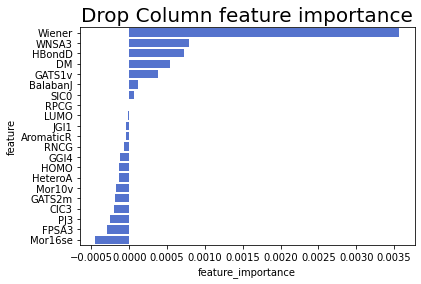

In [19]:
drop_imp = drop_col_feat_imp(model, x_train, y_train)
var_imp_plot(drop_imp, 'Drop Column feature importance')